# Normal Image

The number of rice in the image is 97


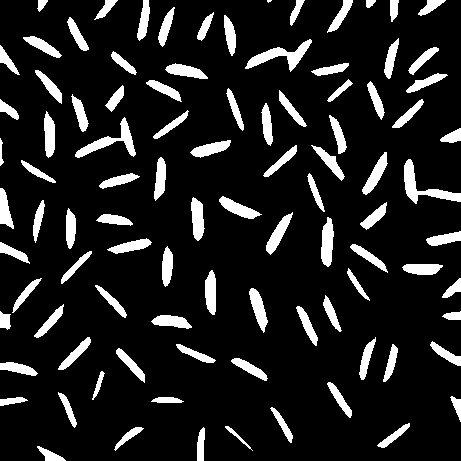

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import filters

img = cv2.imread('data/prj1-2/1_wIXlvBeAFtNVgJd49VObgQ.png')

# Process on raw image

## Convert image to grayscale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Add GaussianFilter to remove noise
gray = cv2.GaussianBlur(gray, (11, 11), 0)

## Increase the brightness by 50
gray = cv2.convertScaleAbs(gray, alpha=1, beta=50)

## Apply CLAHE to enhance constrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray = clahe.apply(gray)

# Process on binary image

## Convert image to binary image using thresholding with otsu threshold
_, thresh_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


## Apply erosion to deal with sticking object
kernel = np.ones((3, 3), np.uint8)
thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_ERODE, kernel, iterations=3)

# Caculate the number of rice using count connectedComponets
num_labels, labels = cv2.connectedComponents(thresh_image)

print(f"The number of rice in the image is {num_labels}")
Image.fromarray(thresh_image)

# Salt Pepper Noise Image

The number of rice in the image is 99


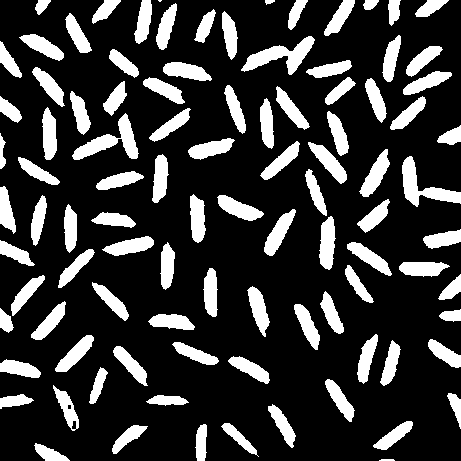

In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import filters

img = cv2.imread('data/prj1-2/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png')

# Process on raw image

## Convert image to grayscale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Add MedianFilter to remove salt and pepper noise
gray = cv2.medianBlur(gray, 3)

## Add GaussianFilter to remove noise
# gray = cv2.GaussianBlur(gray, (11, 11), 0)

## Increase the brightness by 50
gray = cv2.convertScaleAbs(gray, alpha=1, beta=50)

## Apply CLAHE to enhance constrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray = clahe.apply(gray)

# Process on binary image

## Convert image to binary image using thresholding with otsu threshold
_, thresh_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


## Apply erosion to deal with sticking object
kernel = np.ones((3, 3), np.uint8)
thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_ERODE, kernel, iterations=1)

# Caculate the number of rice using count connectedComponets
num_labels, labels = cv2.connectedComponents(thresh_image)

print(f"The number of rice in the image is {num_labels}")
Image.fromarray(thresh_image)

# Fourier Transform

In [83]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# Load the uploaded image
img = cv2.imread('data/prj1-2/1_zd6ypc20QAIFMzrbCmJRMg.png')

## Convert image to grayscale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_np = np.array(gray)

############################################################
##### Add MedianFilter to remove salt and pepper noise #####
############################################################
gray = cv2.medianBlur(gray, 3)

#############################################
######## Apply Fourier Transform ############
#############################################
f = np.fft.fft2(np.array(gray))
fshift = np.fft.fftshift(f)
# Calculate magnitude and phase of frequency spectrum
magnitude = np.abs(fshift)
phase = np.angle(fshift)
# Create a mask to remove the high frequencies related to the stride
rows, cols = img_np.shape
crow, ccol = rows // 2 , cols // 2   # center
# Create a mask with high frequencies (outside a certain radius) removed
mask = np.ones((rows, cols), np.uint8)
# Remove frequencies outside the central low-frequency components (keep low-frequency data)
mask[crow, ccol - 8] = 0
mask[crow, ccol + 8] = 0
new_maginute = magnitude * mask
# Combine magnitude and phase information
fft_shifted_img = new_maginute * np.exp(1j * phase)
# Apply inverse shift to move origin back to top-left
f_ishift = np.fft.ifftshift(fft_shifted_img)
# Inverse Fourier Transform to get the image back
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)


##########################################
########### Image Enhancement ############
##########################################
## Increase the brightness by 50
gray = img_filtered.astype(np.uint8)
gray = cv2.convertScaleAbs(gray, alpha=1, beta=50)
## Apply CLAHE to enhance constrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray = clahe.apply(gray)


##########################################
####### Convert to binary image ##########
##########################################
## Convert image to binary image using thresholding with otsu threshold
# _, thresh_image = cv2.adthreshold(gray.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


##########################################
######## Process on binary image #########
##########################################
## Apply erosion to deal with sticking object
kernel = np.ones((3, 3), np.uint8)
thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_OPEN, kernel, iterations=1)
thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_ERODE, kernel, iterations=1)
thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel, iterations=1)

########################################################################
######  Caculate the number of rice using count connectedComponets #####
########################################################################
num_labels, labels = cv2.connectedComponents(thresh_image)

print(f"The number of rice in the image is {num_labels}")
Image.fromarray(thresh_image)


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/thresh.cpp:1679: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'adaptiveThreshold'


In [59]:
img_filtered

array([[141.02722751, 134.01404553, 127.13134397, ..., 137.01489271,
        130.11128945,  68.08759419],
       [137.02722751, 134.01404553, 128.13134397, ..., 136.01489271,
        129.11128945,  69.08759419],
       [136.02722751, 131.01404553, 131.13134397, ..., 134.01489271,
        127.11128945,  72.08759419],
       ...,
       [108.02722751, 106.01404553, 107.13134397, ..., 113.01489271,
        106.11128945,  49.08759419],
       [106.02722751, 101.01404553,  99.13134397, ..., 111.01489271,
         56.11128945,  46.08759419],
       [ 44.02722751,  37.01404553,  28.13134397, ...,  66.01489271,
         53.11128945,  43.08759419]])

In [43]:
magnitude_spectrum[]

array([[ 82.96742795,  99.05176029,  95.45732495, ...,  91.39569734,
         66.03040986,  72.66995038],
       [108.60071547,  85.36280459,  55.5191404 , ..., 107.5417655 ,
        105.21791902,  91.14714035],
       [ 98.70921811, 108.52008249, 101.04722864, ...,  95.43453695,
        109.65527988,  94.56053217],
       ...,
       [ 94.56053217, 109.65527988,  95.43453695, ..., 101.04722864,
        108.52008249,  98.70921811],
       [ 91.14714035, 105.21791902, 107.5417655 , ...,  55.5191404 ,
         85.36280459, 108.60071547],
       [ 72.66995038,  66.03040986,  91.39569734, ...,  95.45732495,
         99.05176029,  82.96742795]])

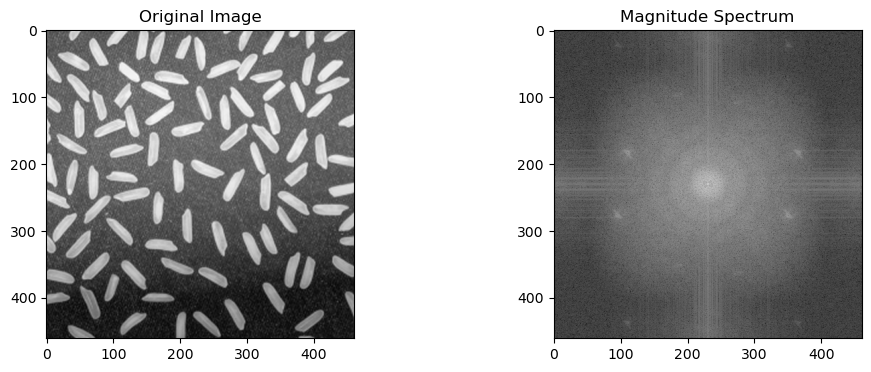

/tmp/ipykernel_791409/2484196051.py:62: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fshift_filtered)), cmap='gray')


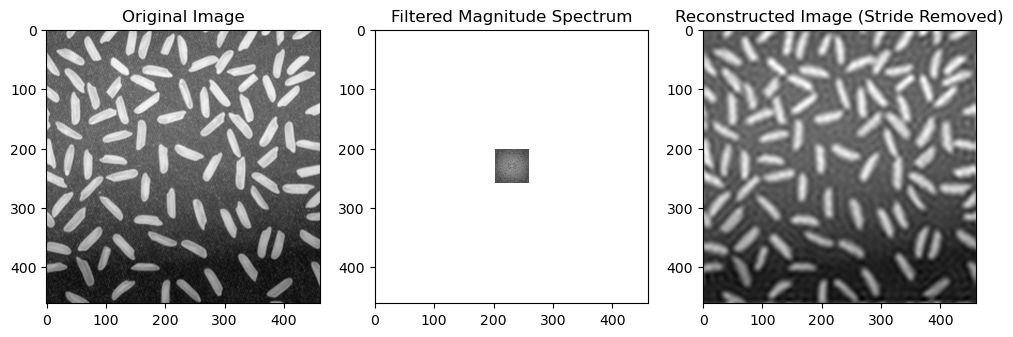

In [66]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the uploaded image
image_path = 'data/prj1-2/1_wIXlvBeAFtNVgJd49VObgQ.png'
img = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert image to numpy array
img_np = np.array(img)

# Apply Fourier Transform
f = np.fft.fft2(img_np)
fshift = np.fft.fftshift(f)

# Get magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Plot the original image and the magnitude spectrum
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.imshow(img_np, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

plt.show()

# Create a mask to remove the high frequencies related to the stride
rows, cols = img_np.shape
crow, ccol = rows // 2 , cols // 2   # center

# Create a mask with high frequencies (outside a certain radius) removed
mask = np.zeros((rows, cols), np.uint8)
r = 30  # Radius for the mask, can be adjusted based on the frequency we want to remove

# Remove frequencies outside the central low-frequency components (keep low-frequency data)
mask[crow - r:crow + r, ccol - r:ccol + r] = 1

# Apply the mask on the shifted Fourier transform
fshift_filtered = fshift * mask

# Apply inverse shift to move origin back to top-left
f_ishift = np.fft.ifftshift(fshift_filtered)

# Inverse Fourier Transform to get the image back
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

# Plot the results
plt.figure(figsize=(12,6))

plt.subplot(1, 3, 1)
plt.imshow(img_np, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(fshift_filtered)), cmap='gray')
plt.title('Filtered Magnitude Spectrum')

plt.subplot(1, 3, 3)
plt.imshow(img_filtered, cmap='gray')
plt.title('Reconstructed Image (Stride Removed)')

plt.show()


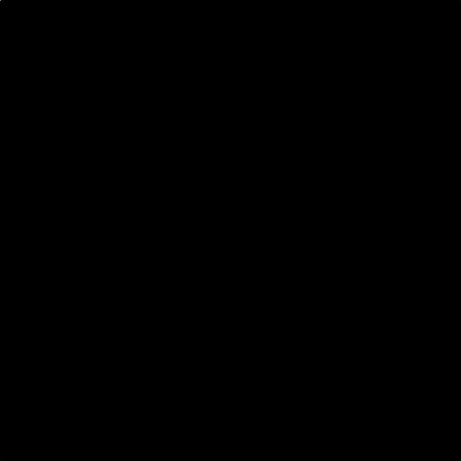

In [21]:
Image.fromarray(img_filtered.astype(np.uint8))

In [23]:
img_filtered.astype(np.uint8)

array([[121,   9,   1, ...,   2,   1,   9],
       [  9,   0,   3, ...,   3,   3,   0],
       [  0,   3,   1, ...,   1,   1,   3],
       ...,
       [  2,   3,   1, ...,   1,   1,   3],
       [  0,   3,   1, ...,   1,   1,   3],
       [  9,   0,   3, ...,   3,   3,   0]], dtype=uint8)

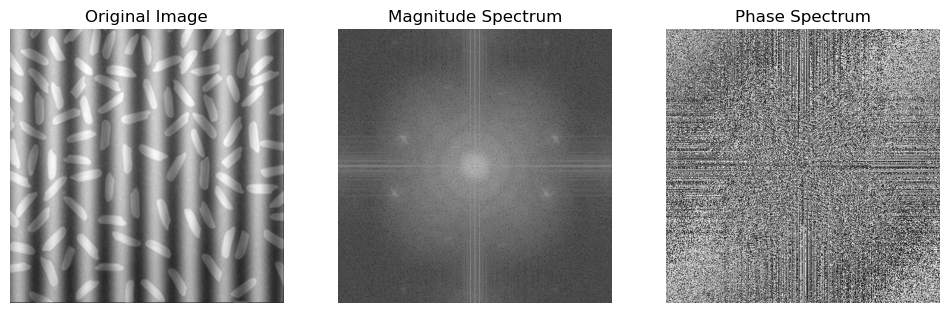

In [12]:
# Display the original image, magnitude spectrum, and phase spectrum
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.axis('off')
plt.subplot(133), plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum'), plt.axis('off')
plt.show()

In [16]:
# Create a mask to remove the high frequencies related to the stride
rows, cols = gray.shape
crow, ccol = rows // 2 , cols // 2   # center

# Create a mask with high frequencies (outside a certain radius) removed
mask = np.ones((rows, cols), np.uint8)
r = 30  # Radius for the mask, can be adjusted based on the frequency we want to remove

# Remove frequencies outside the central low-frequency components (keep low-frequency data)
mask[crow - r:crow + r, ccol - r:ccol + r] = 0

In [15]:
gray.shape

(461, 461)

In [ ]:
# Create a mask to remove the high frequencies related to the stride
rows, cols = img_np.shape
crow, ccol = rows // 2 , cols // 2   # center

# Create a mask with high frequencies (outside a certain radius) removed
mask = np.ones((rows, cols), np.uint8)
r = 30  # Radius for the mask, can be adjusted based on the frequency we want to remove

# Remove frequencies outside the central low-frequency components (keep low-frequency data)
mask[crow - r:crow + r, ccol - r:ccol + r] = 0

# Apply the mask on the shifted Fourier transform
fshift_filtered = fshift * mask

# Apply inverse shift to move origin back to top-left
f_ishift = np.fft.ifftshift(fshift_filtered)

# Inverse Fourier Transform to get the image back
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

# Plot the results
plt.figure(figsize=(12,6))

plt.subplot(1, 3, 1)
plt.imshow(img_np, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(fshift_filtered)), cmap='gray')
plt.title('Filtered Magnitude Spectrum')

plt.subplot(1, 3, 3)
plt.imshow(img_filtered, cmap='gray')
plt.title('Reconstructed Image (Stride Removed)')

plt.show()
